9º Reunião

In [1]:
!pip install yfinance
print('FEITO')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
FEITO


In [11]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

#ticker2 = yf.Ticker("TSLA")

#ticker2.info #mostra as informações que estão dentro da variável

start2 = "2022-01-01"
end2 = "2022-12-15"

df_tudo = yf.download("TSLA",start=start2,end=end2)
print(type(df_tudo))
df_tudo.head() # o método head() mostra as cinco primeiras linhas da tabela 



[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>


Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  382.583344  400.356659  378.679993  399.926666  399.926666   
2022-01-04  396.516663  402.666656  374.350006  383.196655  383.196655   
2022-01-05  382.216675  390.113342  360.336670  362.706665  362.706665   
2022-01-06  359.000000  362.666656  340.166656  354.899994  354.899994   
2022-01-07  360.123322  360.309998  336.666656  342.320007  342.320007   

               Volume  
Date                   
2022-01-03  103931400  
2022-01-04  100248300  
2022-01-05   80119800  
2022-01-06   90336600  
2022-01-07   84164700

In [12]:
print(' ')
print('type() = ', type(df_tudo))
print('len() = ', len(df_tudo))
print('shape = ')
df_tudo.shape

 
type() =  <class 'pandas.core.frame.DataFrame'>
len() =  240
shape = 


(240, 6)

In [13]:
df_tudo.info() #informação resumida da variável

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 240 entries, 2022-01-03 to 2022-12-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       240 non-null    float64
 1   High       240 non-null    float64
 2   Low        240 non-null    float64
 3   Close      240 non-null    float64
 4   Adj Close  240 non-null    float64
 5   Volume     240 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.1 KB


In [15]:
# convert dataframe to numpy array
arr = df_tudo['Adj Close'].to_numpy() # está solecionando todos os valores da coluna adj close e transformando para a classe numpy.arrey(vetor)
 
print('\nNumpy Array\n----------\n')
print(type(arr))
print(np.shape(arr))
print(len(arr))
print(arr)


Numpy Array
----------

<class 'numpy.ndarray'>
(240,)
240
[399.92666626 383.19665527 362.70666504 354.8999939  342.32000732
 352.70666504 354.79998779 368.73999023 343.85333252 349.86999512
 343.50332642 331.8833313  332.08999634 314.6333313  310.
 306.1333313  312.47000122 276.3666687  282.1166687  312.23999023
 310.41665649 301.88665771 297.04666138 307.77334595 302.44665527
 307.33334351 310.66665649 301.5166626  286.66665649 291.92001343
 307.47665405 307.79666138 292.1166687  285.66000366 273.84332275
 254.67999268 266.92333984 269.95666504 290.14334106 288.12332153
 293.29666138 279.76333618 279.42999268 268.19332886 274.79998779
 286.32333374 279.43331909 265.1166687  255.45666504 267.29666138
 280.07666016 290.5333252  301.79666138 307.05334473 331.32666016
 333.03668213 337.97332764 336.88000488 363.94665527 366.52334595
 364.66333008 359.20001221 361.52999878 381.81668091 363.75332642
 348.58666992 352.42001343 341.82998657 325.30999756 328.9833374
 340.79000854 328.3333435

In [17]:
diferenca = arr[239] - arr[238]
print(diferenca)

retorno = diferenca / arr[239]
print(retorno)

-4.149993896484375
-0.02646679729409515


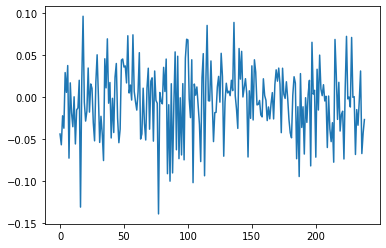

In [22]:
diferenca = np.zeros(239)
retorno = np.zeros(239)
for i in range(239):  #retorno do preço da ação é calculado de forma que o valor é n-1, ou seja 240 dias menos 1
    
    diferenca[i] = arr[i + 1] - arr[i]

    retorno[i] = diferenca[i] / arr[i + 1]
#end for
plt.plot(retorno)
plt.show()


In [23]:
valor_medio = np.mean(retorno)
print(valor_medio)

-0.004749339480600501


In [25]:
desvpad = np.std(retorno)
print(desvpad) 

0.04084301768593381


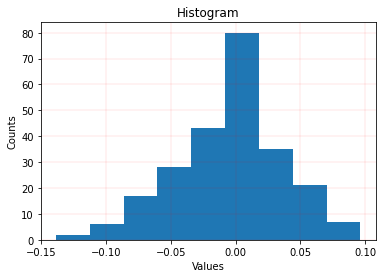

In [32]:
#
# Histogram
#
min2 = np.amin(retorno)
max2 = np.amax(retorno) #vai fazer o hitograma dentro desse intervalo
bins2 = np.linspace(min2, max2, 10) #shape do histograma
#hist2 = np.histogram(retorno, bins = bins2) # proprio cálculo do hist.
plt.hist(retorno,bins2)
plt.title('Histogram')
plt.xlabel('Values')
plt.ylabel('Counts')
plt.grid(color='r', linestyle='-', linewidth=0.1)
plt.show()

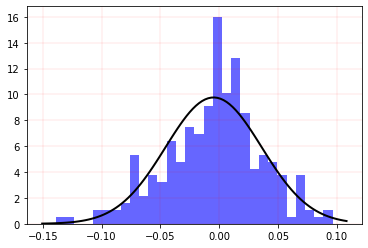

In [36]:
from scipy.stats import norm
# Plot the histogram.
plt.hist(retorno, bins=30, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
mu = valor_medio
std = desvpad
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
plt.grid(color='r', linestyle='-', linewidth=0.1)
plt.show()

In [38]:
#cálculo do VAR 
from scipy.stats import norm
#

mu = -0.004749339480600501
sigma = 0.04084301768593381 # mean and standard deviation

var_95 = norm.ppf(0.05, loc=mu, scale=sigma)
var_5 = norm.ppf(0.95, loc=mu, scale=sigma)

print(var_95)
print(var_5)

valor_dinheiro = 10 # em MM
# o VAR 95% da empresa (base diaria) é igual 0.5 MM
var = (var_95 * valor_dinheiro) + valor_dinheiro
print(var)


-0.07193012525695187
0.06243144629575085
9.280698747430481
